# Explorando los datos del Titanic

La siguiente dataset es uno de los ejercicios clásicos para poner en práctica los conocimientos adquiridos en Python y sus librerias para el manejo de datos.

In [1]:
# Importamos las libreria y el CSV

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Datasets/titanic_data.csv")

In [2]:
# Revisamos el DataFrame, esto se puede hacer mediante el método head, o por medio de un slice:
df[:5] # Esta líneaimport matplotlib.pyplot as plt genera el mismo resultado que df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Revisamos los valores que existen en la columna Survived:

df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

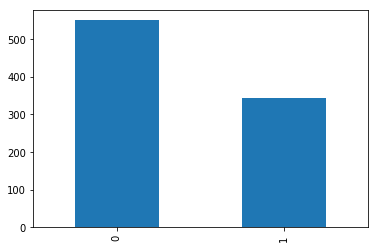

In [6]:
# Bar plot de los pasajeros que murieron (0) en el accidente del Titanic

df.Survived.value_counts().plot(kind="bar", alpha=1)
plt.show()

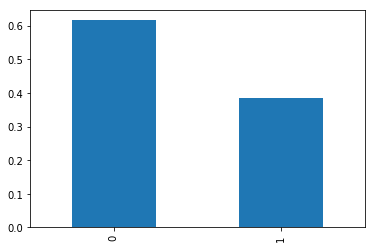

In [7]:
# Al normalizar los datos, los valores de las barras representan porcentajes.

df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=1)
plt.show()

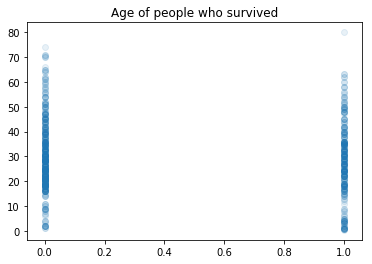

In [8]:
# Gráfica de dispersión de una variable dicótoma. En donde existe
# mayor concentración de datos, los puntos se muestran mas oscuros.

plt.scatter(df.Survived,df.Age, alpha=0.1)
plt.title("Age of people who survived")
plt.show()

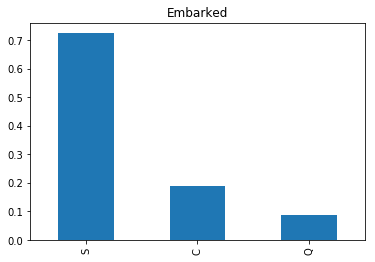

In [9]:
# Se analiza el puerto de embarque:

df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=1)
plt.title("Embarked")
plt.show()

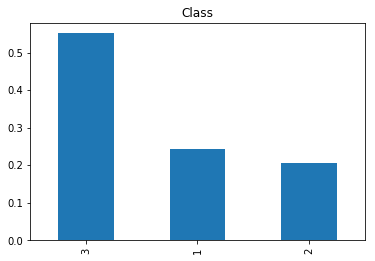

In [10]:

df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=1)
plt.title("Class")
plt.show()

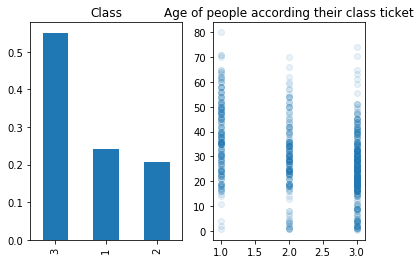

In [11]:
# De forma semejantes se analisa la columna clase
# sin embargo se graficarán de forma simultanea 
# la de barras y la de dispersión.
# El método subplot2grid permite crear una retícula
# en la que se pueden colocar varias gráficas a la vez.

# Primera gráfica
plt.subplot2grid((1,2),(0,0)) #(xy shape),(xy position)
df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=1)
plt.title("Class")

# Segunda gráfica
plt.subplot2grid((1,2),(0,1))
plt.scatter(df.Pclass,df.Age, alpha=0.1)
plt.title("Age of people according their class ticket")
plt.show()

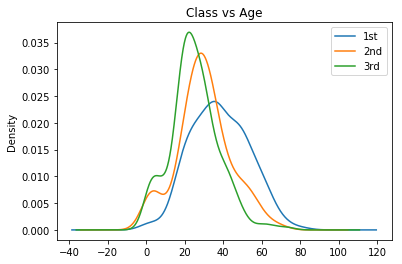

In [12]:
# Para poder obtener una gráfica de densidad (KDE), que
# considere las 3 diferentes clases, será necesario usar
# un ciclo for para filtrar los datos a graficar.

for x in [1,2,3]:
    df.Age[df.Pclass==x].plot(kind="kde")
plt.title("Class vs Age")
plt. legend(("1st", "2nd", "3rd"))
plt.show()

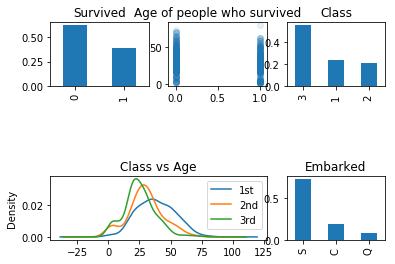

In [13]:
# In order to create a single figure with all the plots, let´s use the method subplot2grid

plt.subplot2grid((3,3),(0,0))
# The first two values indicate the number of rows and columns, the next two values are the position

df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=1)
plt.title("Survived")

plt.subplot2grid((3,3),(0,1))
plt.scatter(df.Survived,df.Age, alpha=0.1)
plt.title("Age of people who survived")

plt.subplot2grid((3,3),(0,2))
df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=1)
plt.title("Class")

plt.subplot2grid((3,3),(2,0), colspan=2)
# colspan will allow the plot to use 2 spots instead of 1
for x in [1,2,3]:
    df.Age[df.Pclass==x].plot(kind="kde")
plt.title("Class vs Age")
plt. legend(("1st", "2nd", "3rd"))

plt.subplot2grid((3,3),(2,2))
df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=1)
plt.title("Embarked")
plt.show()